In [38]:
# Okay, here we will dive deeper into vitamin C

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os

In [40]:
query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

database_url = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_url)

with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)


<Figure size 600x300 with 0 Axes>

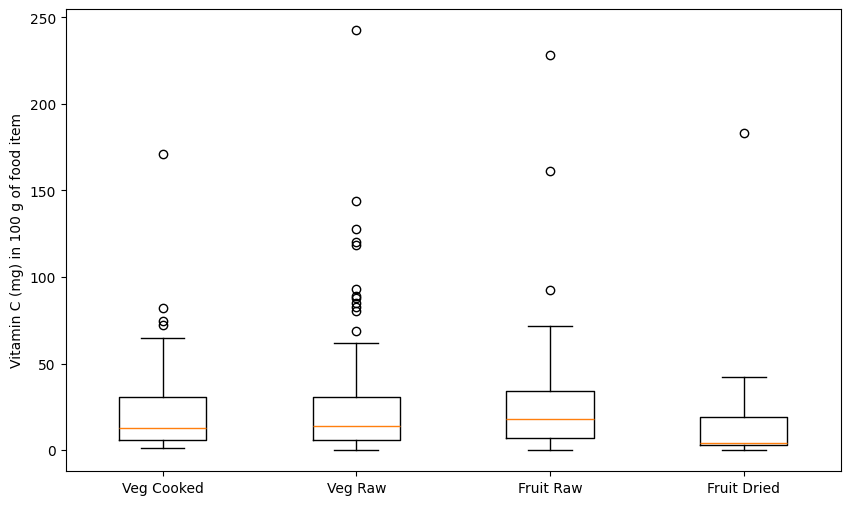

In [41]:
# Let's see how Vitamin C content distributes between 100kcal of products:

data = [df_v_vc['vitamin_c_in_mg'], df_v_vr['vitamin_c_in_mg'], df_v_fr['vitamin_c_in_mg'], df_v_fd['vitamin_c_in_mg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Vitamin C (mg) in 100 g of food item')

# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [42]:
# Top Vitamin C in fruits in 100g

top = df_v_fr[['long_desc', 'vitamin_c_in_mg']].sort_values(by="vitamin_c_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                   long_desc  vitamin_c_in_mg
21                       Guavas, common, raw            228.3
56            Kiwifruit, ZESPRI SunGold, raw            161.3
23                     Kiwifruit, green, raw             92.7
26                              Litchis, raw             71.5
35                              Papayas, raw             60.9
49                         Strawberries, raw             58.8
55       Pineapple, raw, extra sweet variety             56.4
33    Oranges, raw, all commercial varieties             53.2
40             Pineapple, raw, all varieties             47.8
24                             Kumquats, raw             43.9
13              Currants, red and white, raw             41.0
28                   Melons, cantaloupe, raw             36.7
27                               Mangos, raw             36.4
31                           Mulberries, raw             36.4
8                Carambola, (starfruit), raw             34.4
18      

In [43]:
# Top Vitamin C in 100kcal of fruits

top = df_v_fr[['long_desc', 'vitamin_c_in_mg_100kcal']].sort_values(by='vitamin_c_in_mg_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)


                                   long_desc  vitamin_c_in_mg_100kcal
21                       Guavas, common, raw               335.735294
56            Kiwifruit, ZESPRI SunGold, raw               256.031746
49                         Strawberries, raw               183.750000
23                     Kiwifruit, green, raw               151.967213
35                              Papayas, raw               141.627907
33    Oranges, raw, all commercial varieties               113.191489
8                Carambola, (starfruit), raw               110.967742
55       Pineapple, raw, extra sweet variety               110.588235
26                              Litchis, raw               108.333333
28                   Melons, cantaloupe, raw               107.941176
18         Grapefruit, raw, white, all areas               100.909091
25                                Limes, raw                97.000000
40             Pineapple, raw, all varieties                95.600000
31                  

<Figure size 600x300 with 0 Axes>

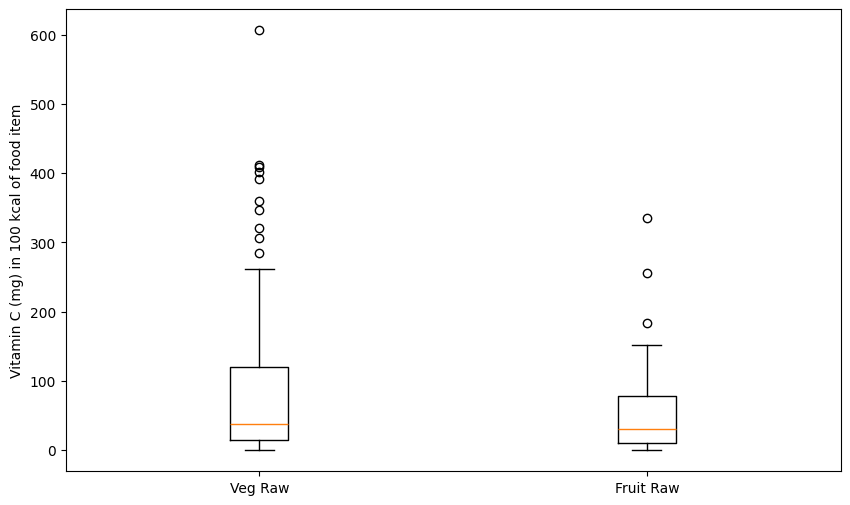

In [44]:
# Let's see how vitamin C content distributes between 100kcal of products:

data = [df_v_vr['vitamin_c_in_mg_100kcal'], df_v_fr['vitamin_c_in_mg_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Vitamin C (mg) in 100 kcal of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [45]:
# But what about vegetables?

top = df_v_vr[['long_desc', 'vitamin_c_in_mg']].sort_values(by="vitamin_c_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)



                           long_desc  vitamin_c_in_mg
77    Peppers, hot chili, green, raw            242.5
79      Peppers, hot chili, red, raw            143.7
80          Peppers, sweet, red, raw            127.7
32                         Kale, raw            120.0
90            Peppers, jalapeno, raw            118.6
91           Peppers, hungarian, raw             92.9
5                      Broccoli, raw             89.2
87           Cauliflower, green, raw             88.1
7              Brussels sprouts, raw             85.0
88               Pepper, banana, raw             82.7
44        Peppers, sweet, green, raw             80.4
24                Cress, garden, raw             69.0
33                     Kohlrabi, raw             62.0
21                       Chives, raw             58.1
10                 Cabbage, red, raw             57.0
16                  Cauliflower, raw             48.2
12  Cabbage, chinese (pak-choi), raw             45.0
89             Peppers, serr

In [46]:
top = df_v_vr[['long_desc', 'vitamin_c_in_mg_100kcal']].sort_values(by='vitamin_c_in_mg_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                       long_desc  vitamin_c_in_mg_100kcal
77                Peppers, hot chili, green, raw               606.250000
80                      Peppers, sweet, red, raw               411.935484
90                        Peppers, jalapeno, raw               408.965517
44                    Peppers, sweet, green, raw               402.000000
70                               Watercress, raw               390.909091
79                  Peppers, hot chili, red, raw               359.250000
12              Cabbage, chinese (pak-choi), raw               346.153846
91                       Peppers, hungarian, raw               320.344828
88                           Pepper, banana, raw               306.296296
87                       Cauliflower, green, raw               284.193548
5                                  Broccoli, raw               262.352941
32                                     Kale, raw               244.897959
33                                 Koh